In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


In [5]:
df=pd.read_csv(r"C:\Users\HP\Downloads\imarticus\EDA Practise\telecom_churn.csv")
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [ ]:
df.columns()

what is the proportion of churned users in our dataframe?

#Churn : the percentage of subscribers who end their contract or subscription with a telecom company within a specific time period

In [11]:
df['Churn'].replace({True:1,False:0},inplace=True)

In [12]:
df['Churn'].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [16]:
df['Churn'].value_counts(normalize=True)

Churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

In [ ]:
14.5% is actually quite bad for a company; such a churn rate can make the company go bankrupt.

In [ ]:
What are average values of numerical features for churned users?

In [17]:
df[df['Churn']==1].mean(numeric_only=True)

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

In [ ]:
How much time (on average) do churned users spend on the phone during daytime?

In [18]:
df[df['Churn']==1]['Total day minutes'].mean()

206.91407867494823

In [ ]:
What is the maximum length of international calls among loyal users (Churn == 0) who do not have an international plan?

In [19]:
df[(df['International plan']=='No') & (df['Churn']==0)]['Total intl minutes'].max()

18.9

In [ ]:
How do the usage patterns (day, evening, night, and international minutes) differ between customers who churn and those who do not?

In [22]:
churned=df[df['Churn']==1]
non_churned=df[df['Churn']==0]
usage_parameters=['Total day minutes','Total eve minutes','Total night minutes']
avg_usage_churned=churned[usage_parameters].mean()
avg_usage_non_churned=non_churned[usage_parameters].mean()

In [23]:
average_usage = pd.DataFrame({'Churned' : avg_usage_churned,'Non_Churned' : avg_usage_non_churned })
average_usage

,Churned,Non_Churned
Total day minutes,206.914079,175.175754
Total eve minutes,212.410145,199.043298
Total night minutes,205.231677,200.133193


<Axes: >

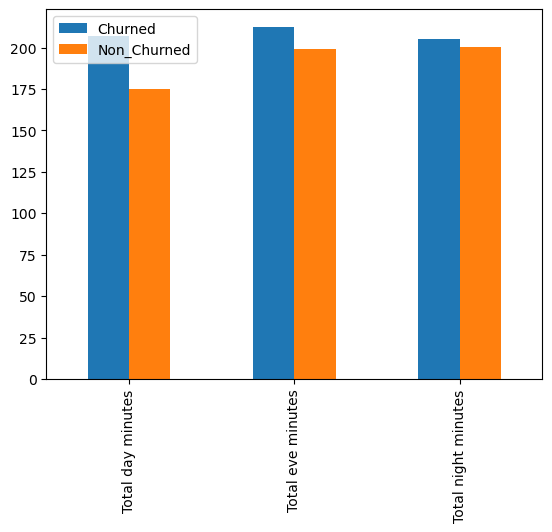

In [24]:
average_usage.plot(kind = 'bar')

In [25]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [ ]:
Are there any notable differences in the number of customer service calls between churned and 
non-churned customers?

In [28]:
df.groupby (df['Churn'])['Customer service calls'].sum()

Churn
0    4132
1    1077
Name: Customer service calls, dtype: int64